# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv('preprocessed_data.csv',nrows=50000)
data.shape

y_value_counts = data['project_is_approved'].value_counts()
print("Number of projects that are approved :   ", y_value_counts[1])
print("Number of projects that are not approved : ", y_value_counts[0])

Number of projects that are approved :    41993
Number of projects that are not approved :  8007


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [4]:
y = data['project_is_approved'].values
x = data.drop(['project_is_approved'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(33500, 8) (33500,)
(16500, 8) (16500,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [10]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## Bow for eassy

In [6]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer.fit(x_train['essay'].values)

set1_feature_names = []
x_train_essay_bow = vectorizer.transform(x_train['essay'].values)
x_test_essay_bow = vectorizer.transform(x_test['essay'].values)

print("Size after vectorization: ")
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)
set1_feature_names.extend(vectorizer.get_feature_names())

Size after vectorization: 
(33500, 5000) (33500,)
(16500, 5000) (16500,)


## 1.4 Make Data Model Ready: encoding numerical, categorical features

## Encoding for categorical features: shool_state

In [7]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values) 
x_train_state_oh = vectorizer.transform(x_train['school_state'].values)
x_test_state_oh = vectorizer.transform(x_test['school_state'].values)

print("Size after vectorization: ")
print(x_train_state_oh.shape, y_train.shape)
print(x_test_state_oh.shape, y_test.shape)
print(vectorizer.get_feature_names())
set1_feature_names.extend(vectorizer.get_feature_names())

Size after vectorization: 
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [13]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## Teacher_prefix

In [8]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values) 

x_train_teacher_oh = vectorizer.transform(x_train['teacher_prefix'].values)
x_test_teacher_oh = vectorizer.transform(x_test['teacher_prefix'].values)

print("After vectorizations")
print(x_train_teacher_oh.shape, y_train.shape)
print(x_test_teacher_oh.shape, y_test.shape)
print(vectorizer.get_feature_names())
set1_feature_names.extend(vectorizer.get_feature_names())

After vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


## project_grade_category

In [9]:
vectorizer = CountVectorizer()
print("Before vectorizations")
print(x_train['project_grade_category'].shape)
vectorizer.fit(x_train['project_grade_category'].values) 

x_train_grade_oh = vectorizer.transform(x_train['project_grade_category'].values)
x_test_grade_oh = vectorizer.transform(x_test['project_grade_category'].values)

print("After vectorizations")
print(x_train_grade_oh.shape, y_train.shape)
print(x_test_grade_oh.shape, y_test.shape)
print(vectorizer.get_feature_names())
set1_feature_names.extend(vectorizer.get_feature_names())

Before vectorizations
(33500,)
After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


## clean_categories

In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values)

x_train_categories_oh=vectorizer.transform(x_train['clean_categories'].values)
x_test_categories_oh=vectorizer.transform(x_test['clean_categories'].values)

print(x_train_categories_oh.shape,y_train.shape)
print(x_test_categories_oh.shape,y_test.shape)
print(vectorizer.get_feature_names())
set1_feature_names.extend(vectorizer.get_feature_names())

(33500, 9) (33500,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


## clean_subcategories

In [11]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values)

x_train_subcategories_oh=vectorizer.transform(x_train['clean_subcategories'].values)
x_test_subcategories_oh=vectorizer.transform(x_test['clean_subcategories'].values)

print(x_train_subcategories_oh.shape,y_train.shape)
print(x_test_subcategories_oh.shape,y_test.shape)
print(vectorizer.get_feature_names())
set1_feature_names.extend(vectorizer.get_feature_names())

(33500, 30) (33500,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


## Encoding for numerical features: Price

In [12]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(x_train['price'].values.reshape(1,-1))

x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(1,-1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(1,-1))
print(x_train_price_norm)
print(x_train_price_norm.shape, y_train.shape)
set1_feature_names.append("price")

[[9.94550675e-04 2.05154397e-03 3.75705636e-03 ... 1.42456481e-02
  1.17347917e-03 5.65851701e-05]]
(1, 33500) (33500,)


## teacher_number_of_previously_posted_projects

In [13]:
normalizer = Normalizer()

normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

x_train_preproj_norm = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_preproj_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
print(x_train_preproj_norm)
print(x_train_preproj_norm.shape, y_train.shape)
set1_feature_names.append("teacher_number_of_previously_posted_projects")

[[0.00041767 0.         0.         ... 0.         0.00020883 0.00167068]]
(1, 33500) (33500,)


In [14]:
x_train_preproj_norm = x_train_preproj_norm.reshape(-1,1)
x_test_preproj_norm = x_test_preproj_norm.reshape(-1,1)
x_train_price_norm = x_train_preproj_norm.reshape(-1,1)
x_test_price_norm = x_test_preproj_norm.reshape(-1,1)
print(x_train_preproj_norm.shape)

(33500, 1)


In [15]:
from scipy.sparse import hstack
x_tr = hstack((x_train_essay_bow, x_train_state_oh, x_train_teacher_oh, x_train_grade_oh, x_train_categories_oh, x_train_subcategories_oh, x_train_price_norm, x_train_preproj_norm)).tocsr()
x_te = hstack((x_test_essay_bow, x_test_state_oh, x_test_teacher_oh, x_test_grade_oh, x_test_categories_oh, x_test_subcategories_oh, x_test_price_norm, x_test_preproj_norm)).tocsr()

print("Final Data matrix")
print(x_tr.shape, y_train.shape)
print(x_te.shape, y_test.shape)

Final Data matrix
(33500, 5101) (33500,)
(16500, 5101) (16500,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [21]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### Hyperparameter Tuning

100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


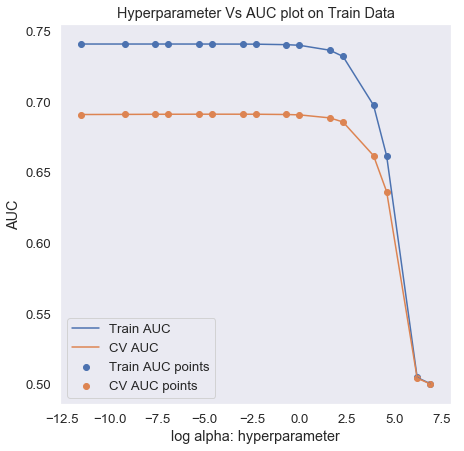

Best alpha:  0.01


In [44]:
#https://classroom.appliedcourse.com/classrooms/JgO5JAP8/assignments/JgO5JAP8/

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import math

mdl = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

clf = GridSearchCV(mdl, parameters, cv= 10, scoring='roc_auc',return_train_score=True)

clf.fit(x_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
a=[]

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
r =  results['param_alpha']

for elem in tqdm(r):
    lg = math.log(elem)
    a.append(lg)
    
plt.figure(figsize=(7,7))   
plt.plot(a, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.plot(a, cv_auc, label='CV AUC')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter Vs AUC plot on Train Data")
plt.grid()
plt.show()
results.head()

print('Best alpha: ',clf.best_params_['alpha'])

### Plotting ROC

In [17]:
# code taken help from 
#https://classroom.appliedcourse.com/classrooms/JgO5JAP8/assignments/JgO5JAP8/

def batch_predict(clf, data):
   

    y_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_pred

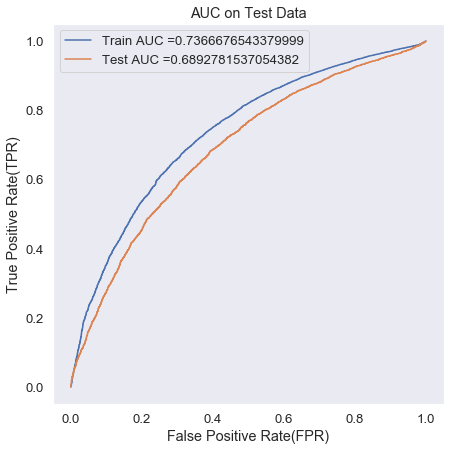

In [45]:
md = MultinomialNB(alpha = clf.best_params_['alpha'],class_prior=[0.5,0.5])
md.fit(x_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(md, x_tr)    
y_test_pred = batch_predict(md, x_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(7,7)) 
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC on Test Data")
plt.grid()
plt.show()


In [22]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The threshold for maximum value of tpr*(1-fpr) is ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

The threshold for maximum value of tpr*(1-fpr) is  0.575
Train confusion matrix
[[ 3691  1674]
 [ 9156 18979]]


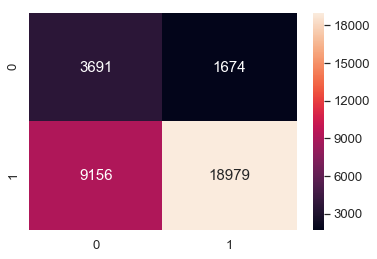

In [23]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
cm1 = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(cm1)

sns.set(font_scale=1.2)
sns.heatmap(cm1, annot=True, annot_kws={"size": 15}, fmt='g')

Test confusion matrix
[[1656  986]
 [4731 9127]]


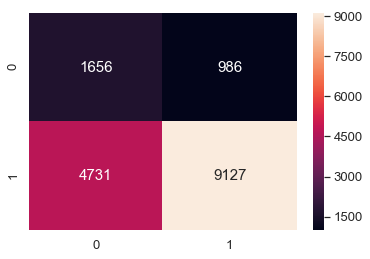

In [24]:
print("Test confusion matrix")
cm2 = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cm2)

sns.set(font_scale=1.2)
sns.heatmap(cm2, annot=True, annot_kws={"size": 15}, fmt='g')

### Encoding essay using TF-IDF

In [25]:
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer.fit(x_train['essay'].values)


x_train_essay_tf = vectorizer.transform(x_train['essay'].values)
x_test_essay_tf = vectorizer.transform(x_test['essay'].values)

print("Size after vectorization: ")
print(x_train_essay_tf.shape, y_train.shape)
print(x_test_essay_tf.shape, y_test.shape)

Size after vectorization: 
(33500, 5000) (33500,)
(16500, 5000) (16500,)


In [26]:
from scipy.sparse import hstack
x_trtf = hstack((x_train_essay_tf, x_train_state_oh, x_train_teacher_oh, x_train_grade_oh, x_train_categories_oh,\
                 x_train_subcategories_oh, x_train_price_norm, x_train_preproj_norm)).tocsr()
x_tetf = hstack((x_test_essay_tf, x_test_state_oh, x_test_teacher_oh, x_test_grade_oh, x_test_categories_oh, \
                 x_test_subcategories_oh, x_test_price_norm, x_test_preproj_norm)).tocsr()

print("Final Data matrix")
print(x_trtf.shape, y_train.shape)
print(x_tetf.shape, y_test.shape)

Final Data matrix
(33500, 5101) (33500,)
(16500, 5101) (16500,)


## Appling NB: TF-IDF featurization

100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 16043.24it/s]


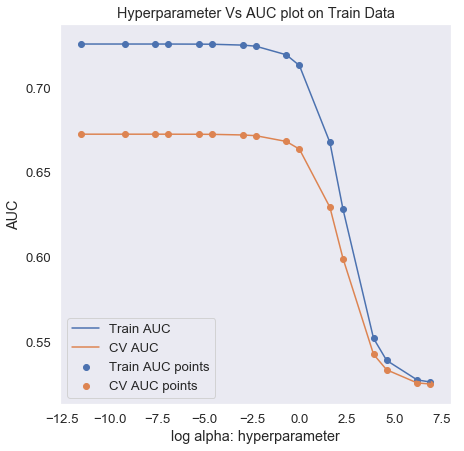

Best alpha:  1e-05


In [46]:
# code taken help from 
#https://classroom.appliedcourse.com/classrooms/JgO5JAP8/assignments/JgO5JAP8/

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import math

mdl = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

clf = GridSearchCV(mdl, parameters, cv= 10, scoring='roc_auc',return_train_score=True)

clf.fit(x_trtf, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
a=[]

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
r =  results['param_alpha']

for elem in tqdm(r):
    lg = math.log(elem)
    a.append(lg)
    
plt.figure(figsize=(7,7))   
plt.plot(a, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.plot(a, cv_auc, label='CV AUC')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter Vs AUC plot on Train Data")
plt.grid()
plt.show()
results.head()

print('Best alpha: ',clf.best_params_['alpha'])

### Plotting ROC

In [28]:
#https://classroom.appliedcourse.com/classrooms/JgO5JAP8/assignments/JgO5JAP8/

def batch_predict(clf, data):
    

    y_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_pred

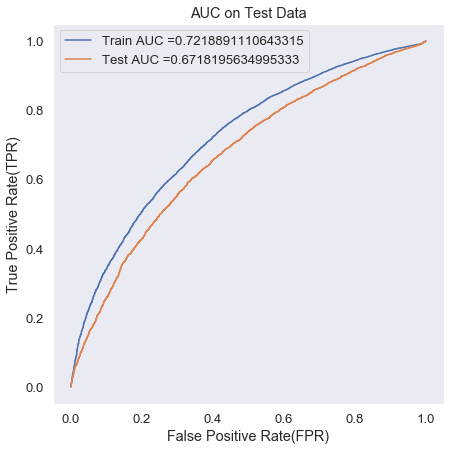

In [47]:
mdl = MultinomialNB(alpha = clf.best_params_['alpha'],class_prior=[0.5,0.5])
mdl.fit(x_trtf, y_train)


y_train_pred = batch_predict(mdl, x_trtf)    
y_test_pred = batch_predict(mdl, x_tetf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(7,7)) 
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC on Test Data")
plt.grid()
plt.show()

In [30]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("The threshold for maximum value of tpr*(1-fpr) is ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

The threshold for maximum value of tpr*(1-fpr) is  0.503
Train confusion matrix
[[ 3521  1844]
 [ 9294 18841]]


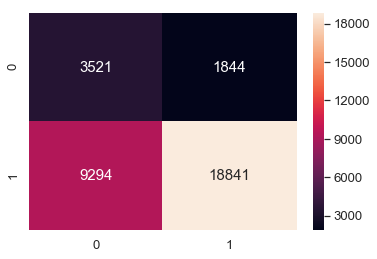

In [31]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
cm1 = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(cm1)

sns.set(font_scale=1.2)
sns.heatmap(cm1, annot=True, annot_kws={"size": 15}, fmt='g')

Test confusion matrix
[[1583 1059]
 [4771 9087]]


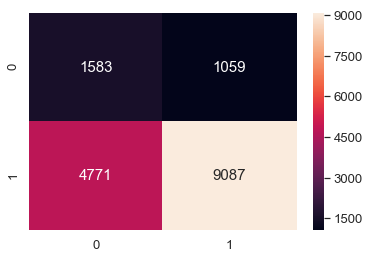

In [32]:
print("Test confusion matrix")
cm2 = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cm2)

sns.set(font_scale=1.2)
sns.heatmap(cm2, annot=True, annot_kws={"size": 15}, fmt='g')

## Top 20 features from Feature Set 1 

In [38]:
zero_class_indx = md.feature_log_prob_[0, :].argsort()   
one_class_indx = md.feature_log_prob_[1, :].argsort()
print('Top twenty features from class 1 :')
print()
print(np.take(set1_feature_names, one_class_indx[-20:])) # elements from an array using indices
print('*'*80)
print('Top twenty features from class 0 :')
print()
print(np.take(set1_feature_names, zero_class_indx[-20:]))

Top twenty features from class 1 :

['able' 'day' 'use' 'need' 'work' 'we' 'reading' 'nannan' 'many' 'help'
 'my students' 'learn' 'they' 'not' 'the' 'learning' 'classroom' 'my'
 'school' 'students']
********************************************************************************
Top twenty features from class 0 :

['reading' 'year' 'able' 'come' 'work' 'we' 'need' 'nannan' 'many'
 'my students' 'the' 'help' 'they' 'learn' 'not' 'classroom' 'my'
 'learning' 'school' 'students']


In [40]:
from prettytable import PrettyTable

tab = PrettyTable()
tab.field_names = ["Vectorizer", "Model", "Hyperparameter", "Test AUC score"]

tab.add_row(["BOW", "Naive Bayes", 0.005, 0.686])
tab.add_row(["TFIDF", "Naive Bayes", 0.00001, 0.659])

print(tab)

+------------+-------------+----------------+----------------+
| Vectorizer |    Model    | Hyperparameter | Test AUC score |
+------------+-------------+----------------+----------------+
|    BOW     | Naive Bayes |     0.005      |     0.686      |
|   TFIDF    | Naive Bayes |     1e-05      |     0.659      |
+------------+-------------+----------------+----------------+


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

### By applying navie bayes on BOW and TF-IDF vectorizer it gives better values than K-NN